In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sym
from scipy import signal, integrate

plt.rcParams['figure.figsize'] = [15, 5]



In [ ]:
#Sinais Básicos Contínuos

(-0.05, 1.0)

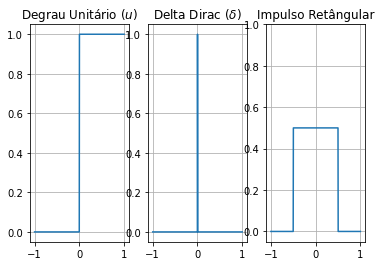

In [ ]:
x = np.linspace(-1, 1, 1000)

# Degrau Unitário
u = np.heaviside(x, 1)

# Delta Dirac ou Impulso Unitário
deltaDirac = signal.unit_impulse(x.shape, 'mid')


# Impulso Retângular
intervalo = 1
amplitude = 0.5
degrauUnitario = ((x > -(intervalo/2)) & (x < (intervalo/2))).astype('float') * amplitude

plt.figure()
plt.subplot(1,3,1)
plt.grid()
plt.title('Degrau Unitário ($u$)')
plt.plot(x, u)
plt.subplot(1,3,2)
plt.grid()
plt.title('Delta Dirac ($\delta$)')
plt.plot(x, deltaDirac)
plt.subplot(1,3,3)
plt.grid()
plt.title('Impulso Retângular')
plt.plot(x, degrauUnitario)
plt.ylim(-0.05, 1)

In [ ]:
#Convolução de Sinais Contínuos

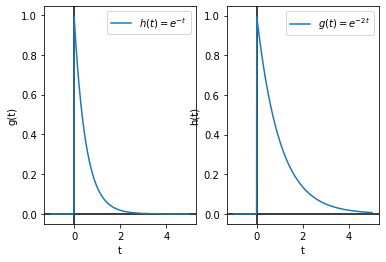

In [ ]:
x = np.linspace(-1, 5, 1000)
u = np.heaviside(x, 1)

g = np.exp(-x) * u
h = np.exp(-2*x) * u


plt.figure()
plt.subplot(1,2,1)
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.plot(x, h, label='$h(t) = e^{-t}$')
plt.xlabel('t')
plt.ylabel('g(t)')
plt.legend()
plt.subplot(1,2,2)
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.plot(x, g, label='$g(t) = e^{-2t}$')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.legend()

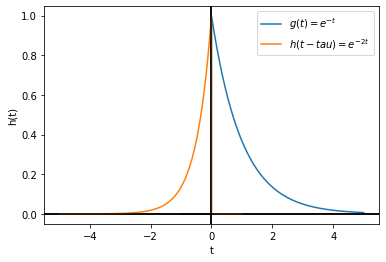

In [ ]:
plt.figure()
#plt.subplot(1,2,1)
plt.plot(x, g, label='$g(t) = e^{-t}$')
plt.xlabel('t')
plt.ylabel('g(t)')
plt.legend()
plt.axvline(0, color='k')
plt.axhline(0, color='k')
#plt.subplot(1,2,2)
plt.plot(-x, h, label='$h(t - tau) = e^{-2t}$')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.legend()

<Figure size 432x288 with 0 Axes>

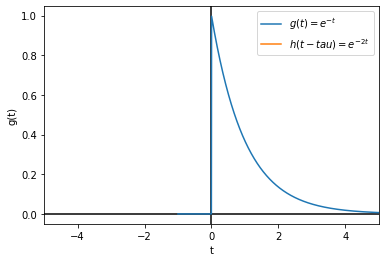

In [ ]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure()
fig, ax = plt.subplots()

def animate(i):

  plt.clf()
  plt.xlabel('t')
  plt.ylabel('g(t)')
  plt.axvline(0, color='k')
  plt.axhline(0, color='k')
  plt.xlim(-5, 5)
  plt.plot(x, g, label='$g(t) = e^{-t}$')
  plt.plot(-x+(i-8), h, label='$h(t - tau) = e^{-2t}$')

  plt.legend()

ani = animation.FuncAnimation(fig, animate, frames=5, interval=500)
HTML(ani.to_jshtml())

Função g(tau) =		 exp(-2*t + 2*tau)
Função h(t - tau) =	 exp(-tau)
Convolução de g com h =	 exp(-t) - exp(-2*t)


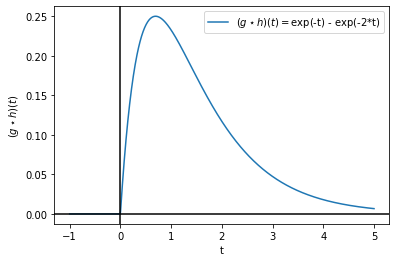

In [ ]:
tau, t = sym.symbols('tau t')

#t=1

g_fun = sym.exp(-2*(t - tau))
h_fun = sym.exp(-tau)

conv_gh = sym.integrate(g_fun * h_fun, (tau, 0, t))

print('Função g(tau) =\t\t', g_fun)
print('Função h(t - tau) =\t', h_fun)
print('Convolução de g com h =\t', conv_gh)

g_h_conv = sym.lambdify(t, conv_gh,'numpy')

plt.figure()
plt.xlabel('t')
plt.ylabel('$(g \star h)(t)$')
plt.plot(x, g_h_conv(x)*u, label='$(g \star h)(t) = $'+str(conv_gh))
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.legend()

In [ ]:
conv_gh

exp(-t) - exp(-2*t)

# Convolução de funções contínuas
com o uso da função lambda

Em Python, existe um conceito bastante poderoso e integrado à linguagem que é chamado de expressão lambda ou forma lambda. O conceito em si é bastante simples: consiste em uma função que é atribuida a um objeto. Por conter a palavra reservada lambda o objeto se comportará como uma função. Uma função lambda é muito pratica, pois funciona como uma função normal, mas só contem uma linha. Funções lambda não utilizam a palavra reservada return.

As funções lambda são sempre opcionais, tudo que fazemos com ela, podemos fazer também com uma função normal. O uso de expressões lambda permite que você possa representar a lógica de uma função sem precisar defini-la explicitamente. Isso pode deixar o código mais facil, mais claro e mais rápido de ser lido.

In [ ]:
Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

In [ ]:
f1 = lambda t: (t>0) * np.exp(-t)
#f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)

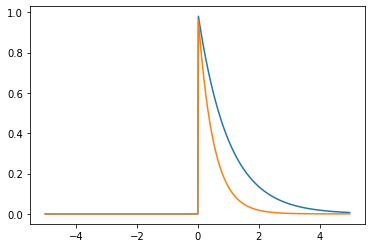

In [ ]:
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')

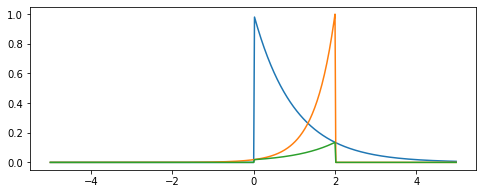

In [ ]:
t0 = 2
flipped = lambda tau: f2(t0-tau)
product = lambda tau: f1(tau)*f2(t0-tau)

plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label=r'$f_1(\tau)$')
plt.plot(t, flipped(t), label=r'$f_2(t_0-\tau)$')
plt.plot(t, product(t), label=r'$f_1(\tau)f_2(t_0-\tau)$')

# Explicitely calculate the integral, using the Simpson integration rule
display(HTML("Result of the convolution (red shaded area): $(f_1*f_2)(t_0=%.0f) = %.2f$" % (t0, integrate.simps(product(t), t))))

In [ ]:
-1/np.exp(2) + np.exp(-1)

0.23254415793482963

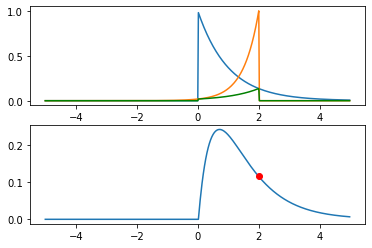

In [ ]:
import scipy.integrate as simps

convolution = np.zeros(len(t))

for n, t_ in enumerate(t):
    prod = lambda tau: f1(tau) * f2(t_-tau)
    convolution[n] = integrate.simps(prod(t), t)

f_shift = lambda t: f2(t0-t)
prod = lambda tau: f1(tau) * f2(t0-tau)

#plot the convolution curve
#plt.figure()
#plt.plot(t, convolution, label='$(f_1*f_2)(t)$')

# Plot the curves

plt.subplot(211)
plt.plot(t, f1(t), label=r'$f_1(\tau)$')
plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
plt.plot(t, prod(t), 'g-', label=r'$f_1(\tau)f_2(t_0-\tau)$')

# plot the convolution curve
plt.subplot(212)
plt.plot(t, convolution, label='$(f_1*f_2)(t)$')

# recalculate the value of the convolution integral at the current time-shift t0
current_value = integrate.simps(prod(t), t)
plt.plot(t0, current_value, 'ro')  # plot the point